In [6]:
#imporing libraries 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
#read the csv file into dataframe
df = pd.read_csv('../01_Data_Cleaning_Case_Study/EDA_insurance_modified_cleaned.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [8]:
#display the df information for all cilumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1203 non-null   float64
 1   sex       1203 non-null   object 
 2   bmi       1203 non-null   float64
 3   children  1203 non-null   float64
 4   smoker    1203 non-null   object 
 5   region    1203 non-null   object 
 6   charges   1203 non-null   float64
dtypes: float64(4), object(3)
memory usage: 65.9+ KB


In [9]:
# check the missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Age feature

will check if changing in the age feature will change in the charges value.

<BarContainer object of 1203 artists>

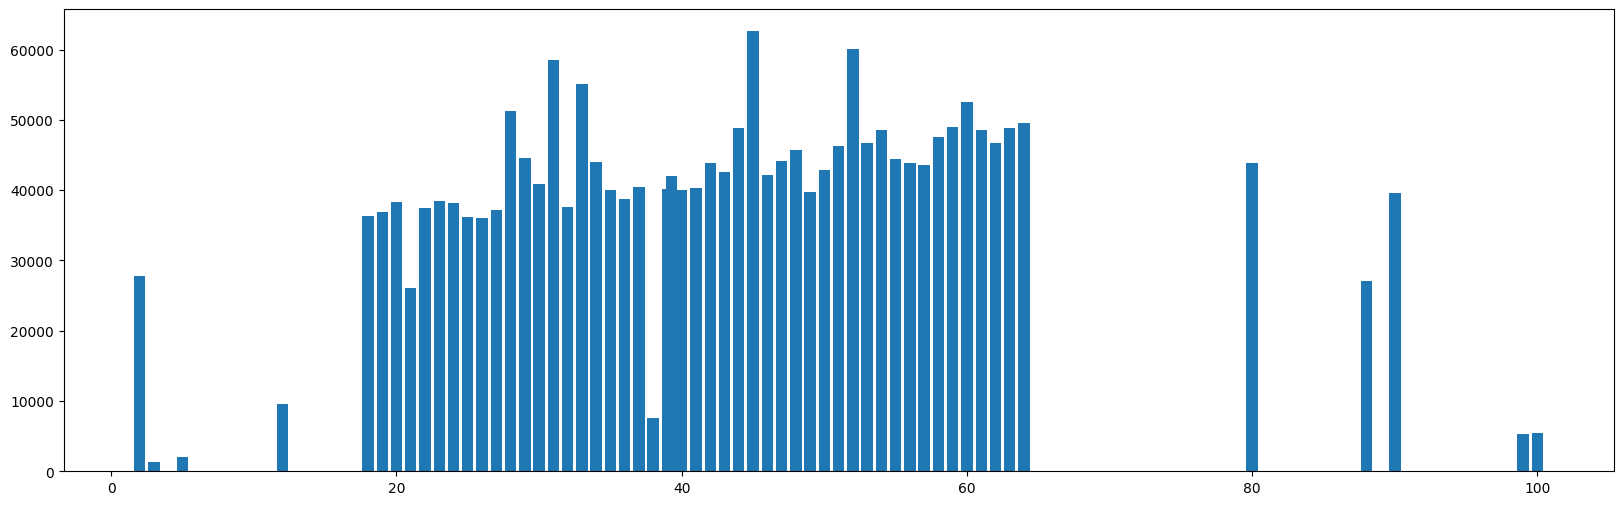

In [10]:
# plt the age with charges by bar chart
plt.figure(figsize = (20,6))
plt.bar(x=df['age'], height=df['charges'])

<AxesSubplot: xlabel='age', ylabel='charges'>

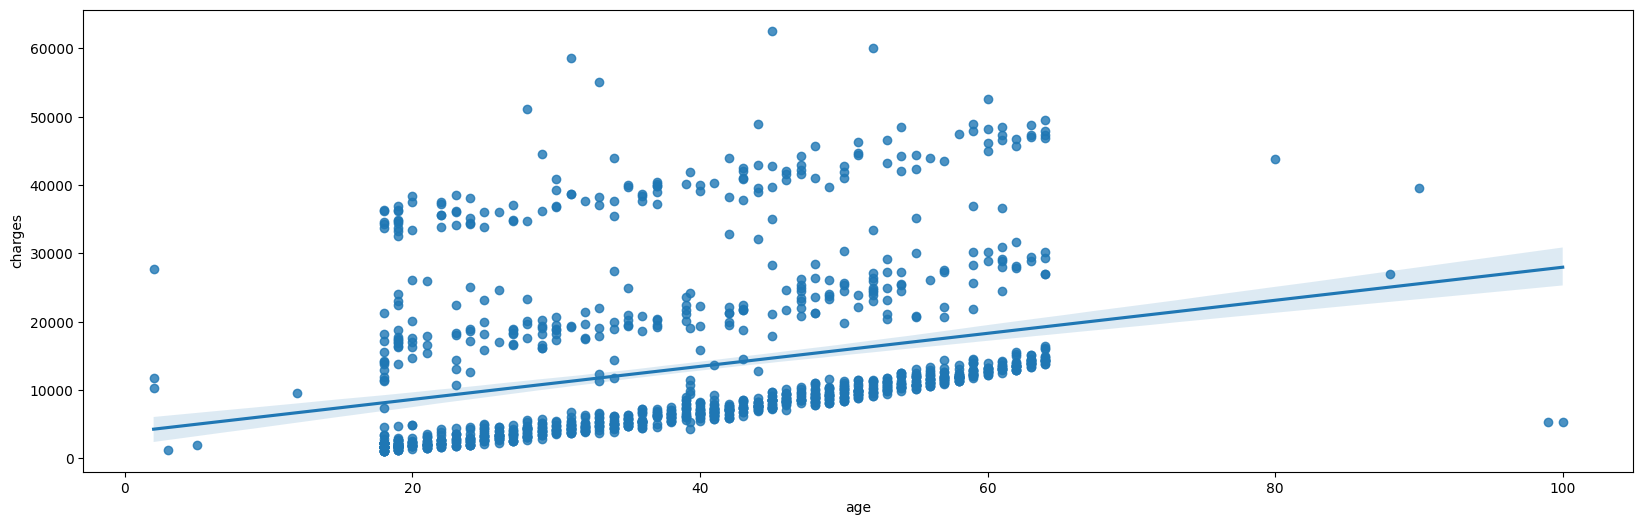

In [11]:
# plot linear regression b/t age and charges 
plt.figure(figsize = (20,6))
sns.regplot(data=df,x='age', y='charges')

The increase in the age will increase the changes. 

# Gender feature

female avg charges:	12385
male avg charges:	14277


<AxesSubplot: >

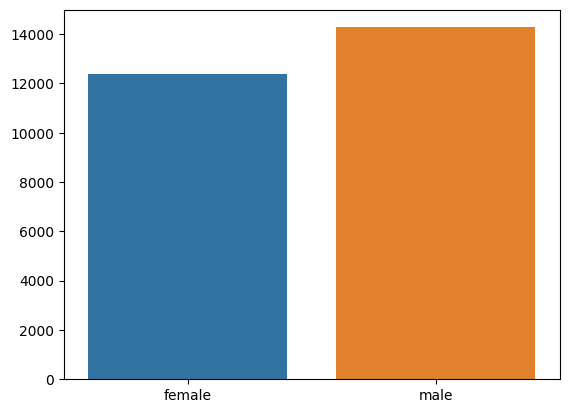

In [12]:
# check the average value of charges for each gender and plot them
f_charges_avg = round(df[df['sex']=='female']['charges'].mean())
m_charges_avg = round(df[df['sex']=='male']['charges'].mean())
print('female avg charges:\t' + str(f_charges_avg))
print('male avg charges:\t' + str(m_charges_avg))

sns.barplot(x=['female', 'male'], y=[f_charges_avg, m_charges_avg])

The male has high average in the charges than the female. 

# BMI Feature

<BarContainer object of 1203 artists>

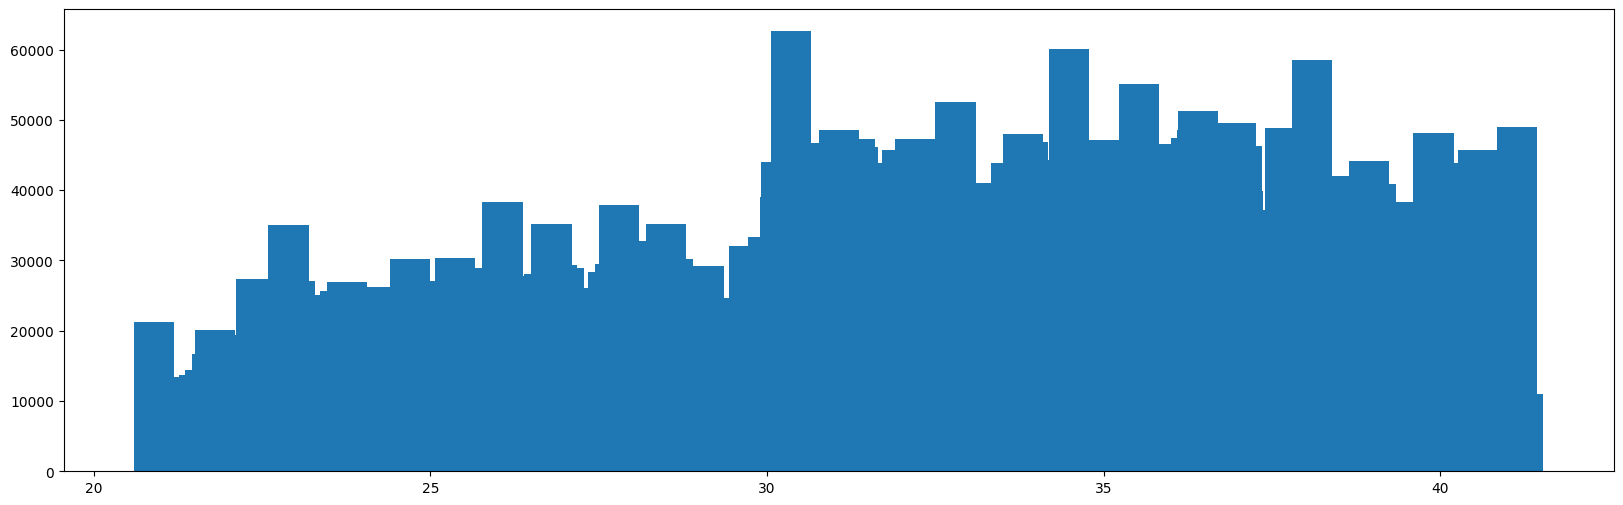

In [13]:
# plt the bmi with charges by bar chart
plt.figure(figsize = (20,6))
plt.bar(x=df['bmi'], height=df['charges'], width=0.6)

<AxesSubplot: xlabel='bmi', ylabel='charges'>

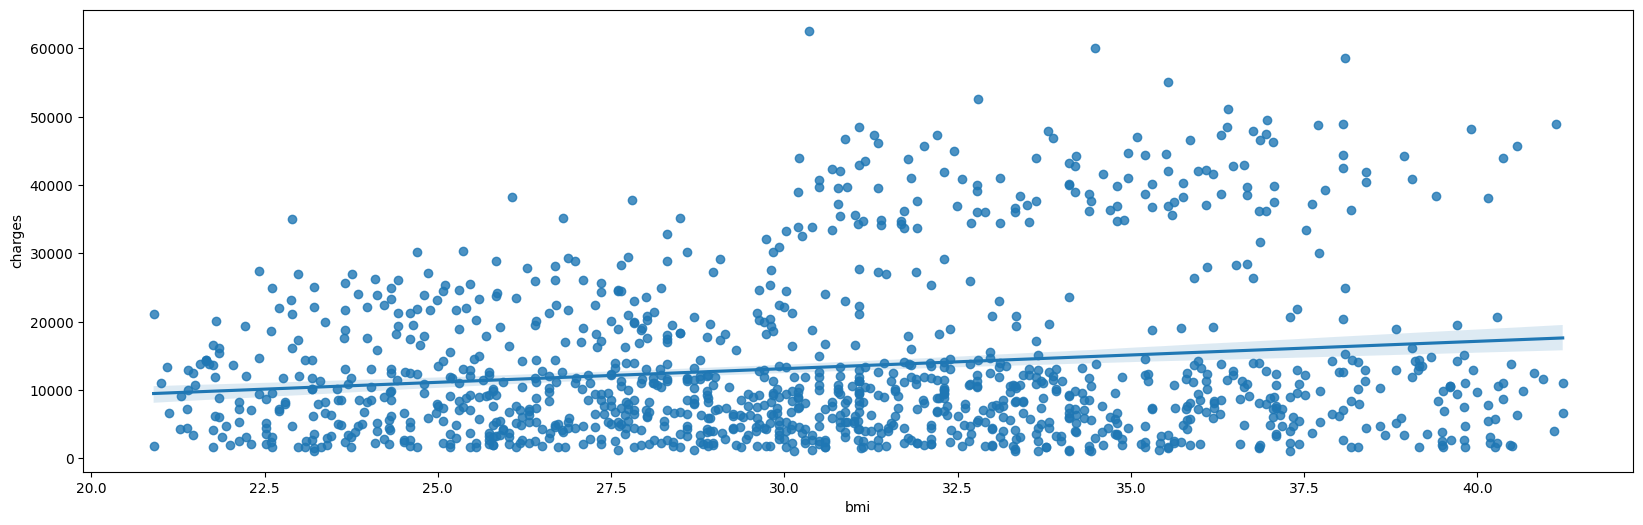

In [14]:
# plot linear regression b/t bmi and charges 
plt.figure(figsize = (20,6))
sns.regplot(data=df,x='bmi', y='charges')

Increase in the BMI will cause incarese in the charges.

# children Feature

Text(0, 0.5, 'Average of charges')

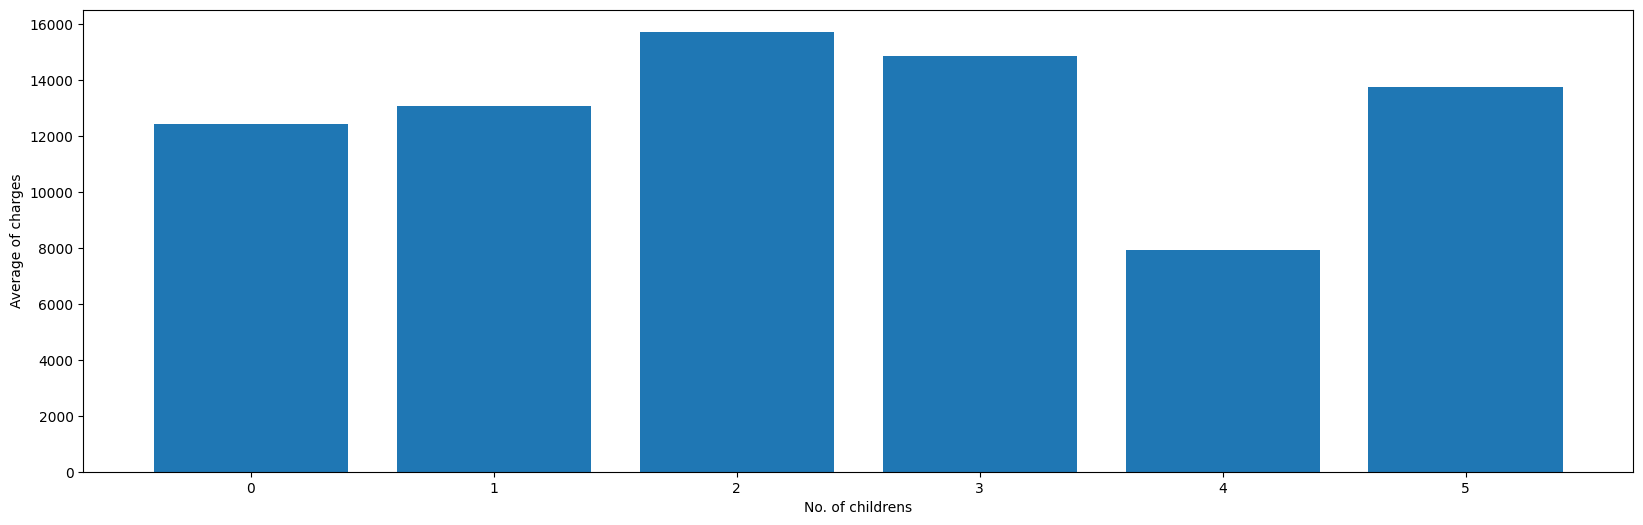

In [15]:
# plt the children with charges by bar chart
children_mean_charges_df = df.groupby('children')['charges'].mean()
plt.figure(figsize = (20,6))
plt.bar(x=df['children'].unique(), height=children_mean_charges_df)
plt.xlabel('No. of childrens')
plt.ylabel('Average of charges')

# Smoker feature

Text(0, 0.5, 'Average of charges')

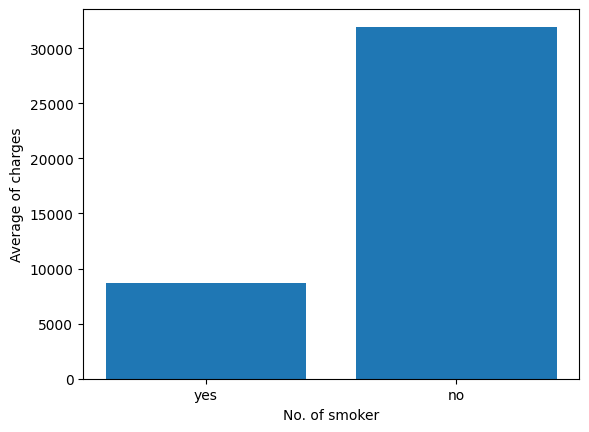

In [16]:
# plt the smoker with charges by bar chart
smoker_mean_charges_df = df.groupby('smoker')['charges'].mean()
#plt.figure(figsize = (20,6))
plt.bar(x=df['smoker'].unique(), height=smoker_mean_charges_df)
plt.xlabel('No. of smoker')
plt.ylabel('Average of charges')

# Region feature

<BarContainer object of 4 artists>

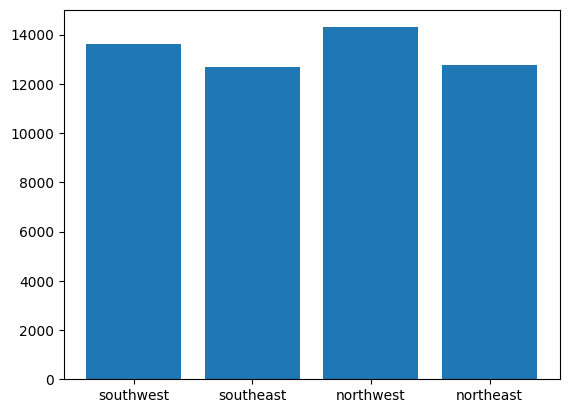

In [17]:
# plot region feature with the charges
plt.bar(x=df['region'].unique(), height=df.groupby('region')['charges'].mean())

Each region has diffrenet average of charges.

# Encode the categorical features

## Encoding using Pandas Get_Dummies() function

In [18]:
#encode the gender feature
df_encoded = pd.get_dummies(data=df, columns=['sex', 'smoker', 'region'], prefix=['gender', 'smoker', 'region'])
#encode the region feature
df_encoded

,age,bmi,children,charges,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770,1.0,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000,3.0,4449.46200,0,1,1,0,0,0,1,0
3,33.0,22.705,0.0,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880,0.0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1198,50.0,30.970,3.0,10600.54830,0,1,1,0,0,1,0,0
1199,18.0,31.920,0.0,2205.98080,1,0,1,0,1,0,0,0
1200,18.0,36.850,0.0,1629.83350,1,0,1,0,0,0,1,0
1201,21.0,25.800,0.0,2007.94500,1,0,1,0,0,0,0,1


No significant correlation b/t the features to each other, except the 'charges' features to others.

## Encoding using Pandas SciKet OneHotEncoder() function

In [19]:
#onehotencoder object
oh_encoder = OneHotEncoder(sparse_output=False)
#fit and ransform the encoder, then convert it to pandas dataframe
ohe_df = pd.DataFrame(oh_encoder.fit_transform(df[['sex', 'smoker', 'region']]), columns=oh_encoder.get_feature_names_out())
#concatenate the original df to the encoded one, then drop the original column that have been encoded 
last_df = pd.concat([df, ohe_df], axis=1).drop(['sex', 'smoker', 'region'], axis=1)
#display top 5 rows from the df
last_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


# Correlation b/t all features

<AxesSubplot: >

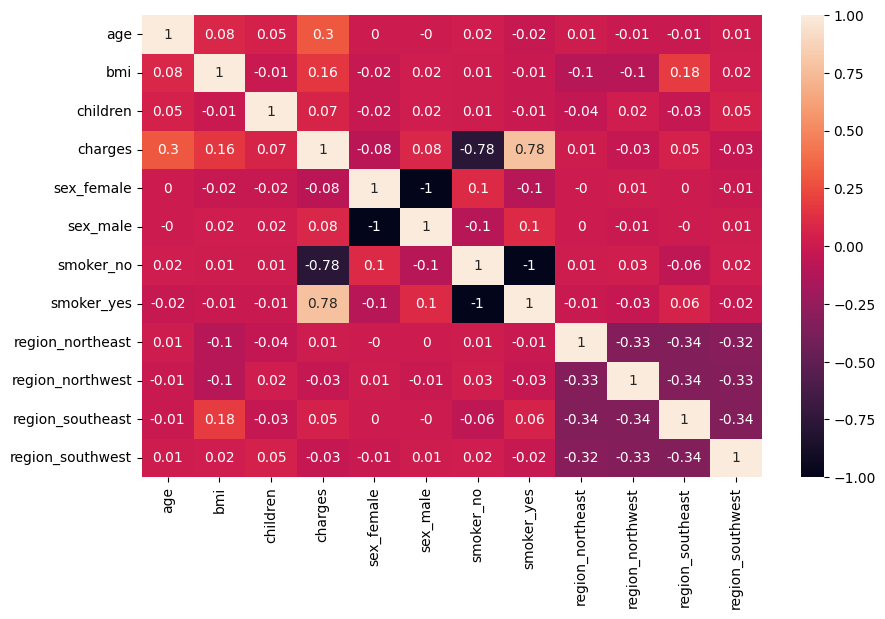

In [20]:
#check the corelation b/t features via correlation map
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(round(last_df.corr(), 2), annot=True)

In [21]:
# save the df to csv file
last_df.to_csv("./EDA_insurance_modified_encoded.csv", sep=",", index=False)